In [ ]:
# Sarah Sami
# Student ID: 101334588
# Date: 2022-12-06
# Course: Applied Data Science - Reza Dibaj
# Description: This is the notebook for the final data science project

In [ ]:
# Successfully import data into a pandas DataFrame.	
# Display shape and summary statistics of the data, also check if there are any NaN values in the data and deal with them if necessary.
# Plot the data using matplotlib with at-least 2 different chart types
# Split the data into training and testing set for validation and performance measuring.
# Train a linear regression model using the SKLearn library, with training data	
# Test the trained model with testing data set by making predictions.	
# Check and display the performance of the model with Mean Squared Error.

In [42]:
# Successfully import data into a pandas DataFrame.	
# first import pandas and numpy - then read the csv file
# then print the first 5 rows of the data

import pandas as pd
import numpy as np

df = pd.read_csv('Crime.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [43]:
# Display shape and summary statistics of the data, also check if there are any NaN values in the data and deal with them if necessary.

# print the shape of the data
df.shape

(50, 7)

In [44]:
# print the summary statistics of the data
df.describe()

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,616.180000,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,573.739175,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,230.750000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,454.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,822.500000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,3545.000000,86.000000,81.000000,34.000000,81.000000,36.000000


In [45]:
# check if there are any NaN values in the data
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

In [46]:
# drop the rows with NaN values
df.dropna(inplace=True)

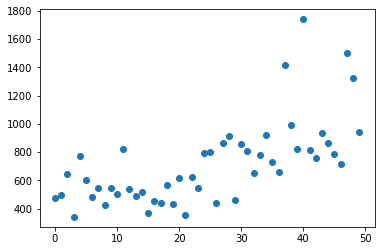

In [34]:
# Plot the data using matplotlib with at-least 2 different chart types

# plot the data using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# plot the data using matplotlib
# use scatter plot to plot the data - with the x-axis as the cities (index of the dataframe)
#  and y-axis as total overall reported crime rate per 1 million residents (X1)
plt.scatter(df.index, df['X1'])

# here we can see that the data is not linearly separable - so we use scatter plot
# also we can easily see the outliers in the data
# city 40 for example has a very high crime rate - outlier
# city 4 has a very low crime rate - outlier

# this helps because in data analysis and predictions, it is good practice to remove outliers so that the data fed to the model is more consistent

<AxesSubplot:>

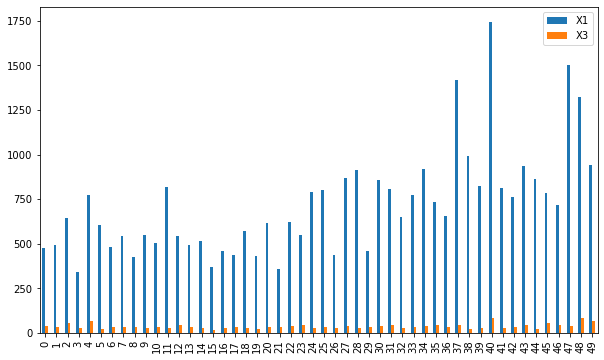

In [30]:
# second plot of different type using matplotlib
# X1 = total overall reported crime rate per 1 million residents.
# X2 = reported violent crime rate per 100,000 residents
# X3 = annual police funding in $/resident
# X4 = % of people 25 years+ with 4 yrs. of high school
# X5 = % of 16 to 19 year-olds not in high school and not high school graduates.
# X6 = % of 18 to 24 year-olds in college
# X7 = % of people 25 years+ with at least 4 years of college

# plot the data using matplotlib but only show x1 and x5 ---> this way we can analyze the relationship between the two variables
df[['X1', 'X3']].plot(kind='bar', figsize=(10, 6))

# for example police funding and reported crime rate per 1 million residents are highest together
#  so we can say that there is a positive correlation between the two variables


In [48]:
# Split the data into training and testing set for validation and performance measuring.

# this is everything but the first column or target variable
x = df.loc[:, df.columns != 'X1'].values

In [49]:
# this is the first column or target variable
y = df.loc[:, df.columns == 'X1'].values

In [51]:
from sklearn.model_selection import train_test_split

# split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# The random state hyperparameter in the train_test_split() function:
#  controls the shuffling process.
#  With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.
#  With random_state=0 , we get the same train and test sets across different executions.

In [52]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model using the SKLearn library, with training data

# create a linear regression object
regressor = LinearRegression()

# fit the training data to the linear regression object
regressor.fit(x_train, y_train)

# Test the trained model with testing data set by making predictions.

# make predictions using the testing data
y_pred = regressor.predict(x_test)

In [53]:
print(y_pred)

[[812.77957406]
 [370.47097375]
 [573.10810066]
 [718.22854129]
 [716.82942257]
 [856.28668313]
 [821.66790065]
 [859.40921933]
 [627.22018798]
 [609.81019762]]


In [54]:
# Check and display the performance of the model with Mean Squared Error.

from sklearn.metrics import mean_squared_error

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(mse)

# this number looks huge because the mean squared error is calculated by taking the mean of the difference between the actual and predicted values and SQUARING IT 

28806.586771185735


In [55]:
# print the root mean squared error
print(np.sqrt(mse))

169.72503283601313
